# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [17]:
# [Answer to ex. 12.1.1 here]

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm

df_raw = pd.read_csv('peer_effects_room.csv')
#I did not know how to solve this question, so I used the code in the writeup
df = df_raw.merge(df_raw[['person','room']], on = 'room', suffixes=('','_other'))

df = df[df['person']!= df['person_other']]

print(df)

      person  room  high_school_GPA  college_GPA  person_other
1          0   351        -1.715472    -1.285307          1645
2       1645   351        -0.818594    -0.434847             0
5          1   738        -0.530190    -0.031833          1039
6       1039   738        -0.493444     0.299729             1
9          2   247        -0.589543    -0.203230           944
...      ...   ...              ...          ...           ...
3990    1951    54         2.111587    -0.610765          1860
3993    1884   178        -1.261528    -2.280256          1916
3994    1916   178        -1.706630    -3.209575          1884
3997    1922   730         1.642223     4.076931          1946
3998    1946   730        -0.121075     0.114143          1922

[2000 rows x 5 columns]


<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [19]:
# [Answer to ex. 12.1.2 here]
df = df.merge(df_raw[['person','high_school_GPA','college_GPA']], left_on='person_other', right_on='person', suffixes=('','_other'))
#removing duplicate column
df = df.loc[:,~df.columns.duplicated()]


<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

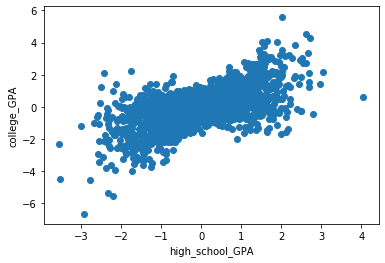

In [12]:
# [Answer to ex. 12.1.3 here]

plt.scatter(df['high_school_GPA'],df['college_GPA'])
plt.xlabel('high_school_GPA')
plt.ylabel('college_GPA')
plt.show()


<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

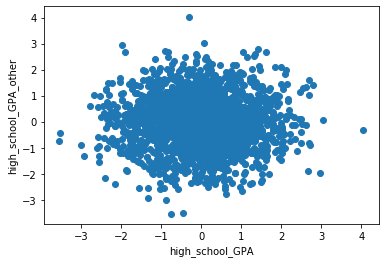

In [15]:
# [Answer to ex. 12.1.4 here]

plt.scatter(df['high_school_GPA'],df['high_school_GPA_other'])
plt.xlabel('high_school_GPA')
plt.ylabel('high_school_GPA_other')
plt.show()

- As can be seen above, there is no visible correlation between the high school GPA of room mates
- as mentioned this is to be expected at random assignment. Hence people don't choose their own room mate.

In [20]:
mod = sm.OLS(df['high_school_GPA_other'], df['high_school_GPA'])
res = mod.fit()
print(res.summary())

                                  OLS Regression Results                                  
Dep. Variable:     high_school_GPA_other   R-squared (uncentered):                   0.000
Model:                               OLS   Adj. R-squared (uncentered):             -0.000
Method:                    Least Squares   F-statistic:                            0.05536
Date:                   Fri, 22 May 2020   Prob (F-statistic):                       0.814
Time:                           17:11:46   Log-Likelihood:                         -2884.4
No. Observations:                   2000   AIC:                                      5771.
Df Residuals:                       1999   BIC:                                      5776.
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------

- as can be seen above, with a P value of 0.8, the null hypothesis is very likely, hence there is no correlation between the room mates GPA

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

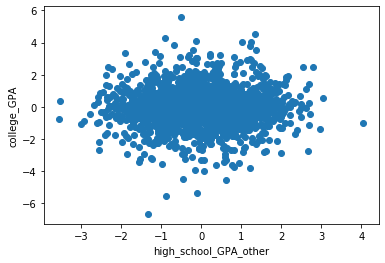

In [21]:
# [Answer to ex. 12.1.5 here]
plt.scatter(df['high_school_GPA_other'],df['college_GPA'])
plt.xlabel('high_school_GPA_other')
plt.ylabel('college_GPA')
plt.show()


There is no visible correlation

In [22]:
mod = sm.OLS(df['college_GPA'], df['high_school_GPA_other'])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:            college_GPA   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.702
Date:                Fri, 22 May 2020   Prob (F-statistic):                       0.192
Time:                        17:17:43   Log-Likelihood:                         -3100.9
No. Observations:                2000   AIC:                                      6204.
Df Residuals:                    1999   BIC:                                      6209.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

The P value of 0.2 means there is no correlation, however the P value is lower than before and the coefficient is positive, suggesting a possible correlation, if other factors would be accounted for.

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

In [138]:
# [Answer to ex. 12.1.6 here]


<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.